# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cleaning Training Data

## Importing Data

In [2]:
train = pd.read_csv('../RawData/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Let us first spot the missing data

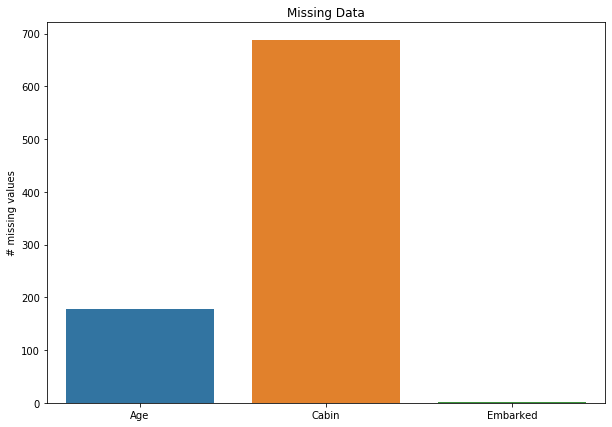

In [4]:
df = pd.DataFrame((len(train) - train.count()),columns = ['# missing values'])
df = df[df['# missing values'] > 0]
plt.figure(figsize = (10,7))
sns.barplot(df.index,'# missing values',data = df)
plt.title('Missing Data')
plt.show()

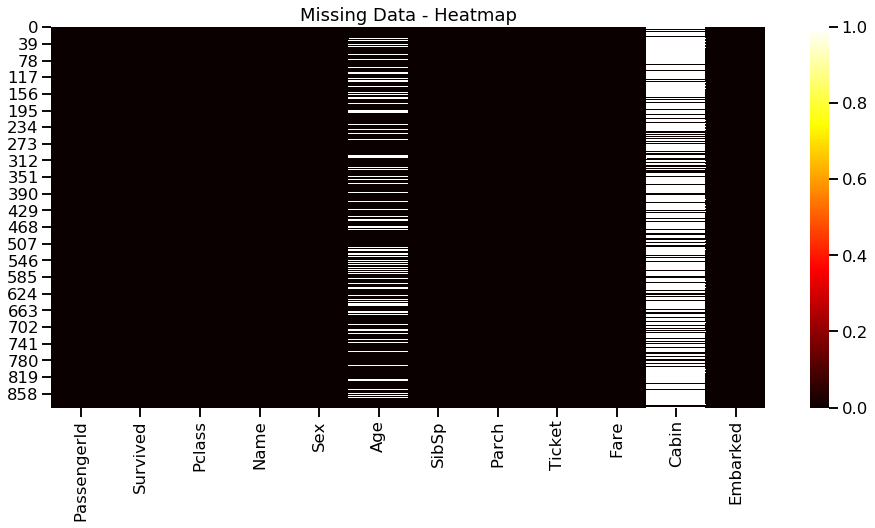

In [5]:
plt.figure(figsize = (16,7))
sns.set_context('talk')
sns.heatmap(train.isna(),cmap='hot')
plt.title('Missing Data - Heatmap')
plt.show()

Cabin feature has a lot of missing data, we will analyze how the available information of the cabin section affects the result, if it doesn't affect VERY significantly, we will drop this feature. Same goes with Age section except it has much less missing data.

## Let us visualize the importance of the given features

### 1) Pclass :

In [6]:
train['Pclass'].unique()

array([3, 1, 2])

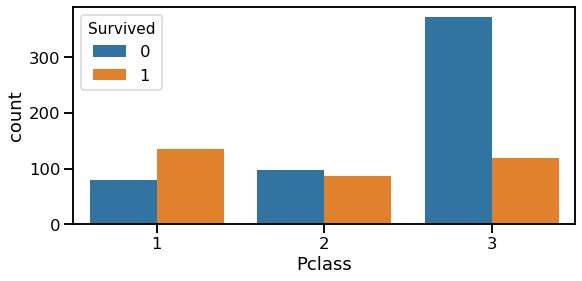

In [7]:
plt.figure(figsize = (9,4))
sns.countplot(x = 'Pclass', data = train,hue = 'Survived')

#### It is obvious that Pclass has a relation with survival, hence we keep this feature.

### 2) Name

 Obviously the name of the individual cannot determine his/her fate, but this information can still be used to find potential family members using the surnames. This info can be used to determine the survival of the individual depending upon the survival of that family members as they most probably will stick together. However there might be a chance of getting a low accuracy of this analysis. I will try this variation later.

In [8]:
train.drop(['Name'], axis = 1, inplace = True)

### 3) Sex

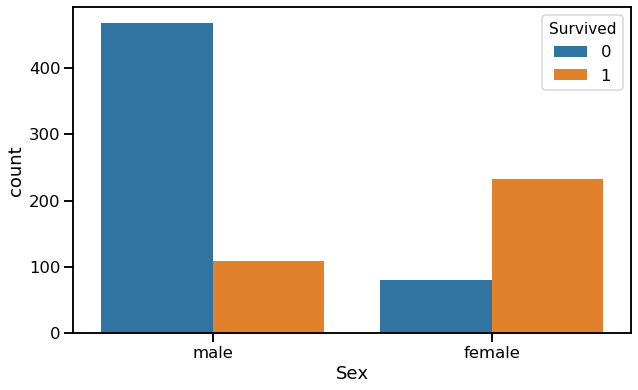

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Sex', data = train,hue = 'Survived')

#### As seen above, it is obvious that sex of the person has a relation with his/her survival, hence we keep this feature.

### 4) Age

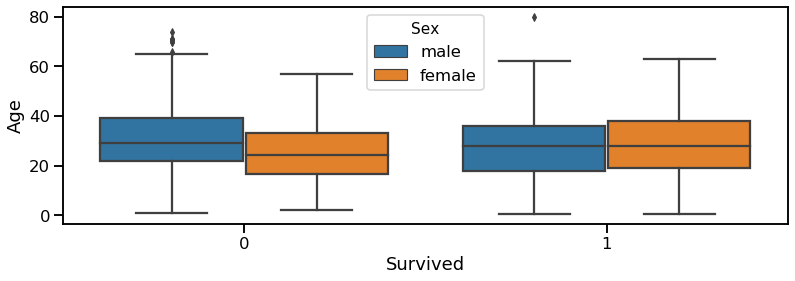

In [10]:
plt.figure(figsize = (13,4))
sns.boxplot('Survived','Age','Sex',train)

As seen above, there is not any major significant pattern in the relationship of Age and Survival, also some data of Age section is also missing as seen in the heatmap at the top. This feature may affect the accuracy of the model negatively, let us drop this feature in this variation.

In [11]:
train.drop(['Age'], axis = 1, inplace = True)

### 5) Sibsp

In [12]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

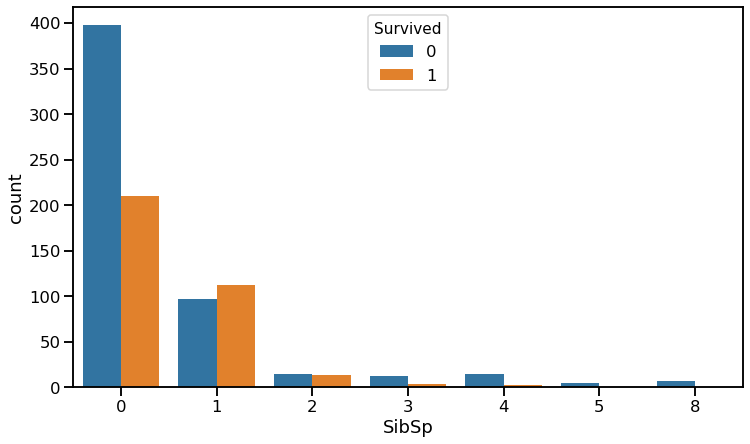

In [13]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'SibSp', data = train,hue = 'Survived')

Although there is very low information when SibSp > 2, we still do see some pattern difference when SibSp = 1 & Sibsp = 0. Also this feature has no missing data, so let us keep it.

### 6) Parch

In [14]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

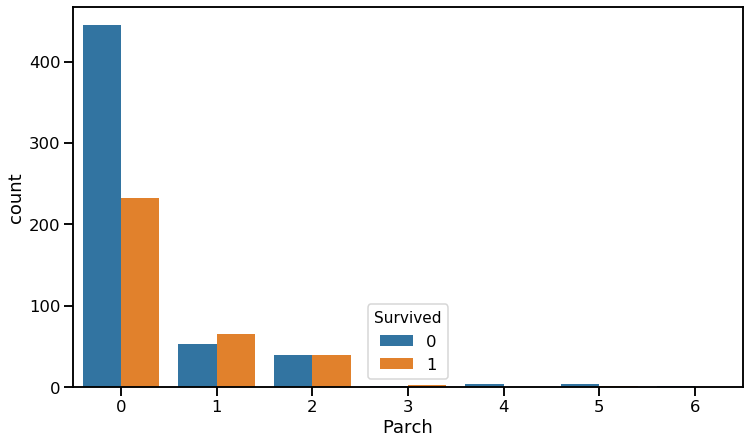

In [15]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'Parch', data = train,hue = 'Survived')

Parch feature shows similar behaviour to SibSp, we keep it too.

### 7) Ticket

In [16]:
train['Ticket'].nunique()

681

There are too many type of tickets, which are obviously in string format. It'll be difficult to find any pattern between this feature and the survival. Although it can still be used to find the missing values of the Embarked section, but since there are only 2 missing values, it isn't significant. Hence, we drop this feature

In [17]:
train.drop(['Ticket'], axis = 1, inplace = True)

### 8) Fare

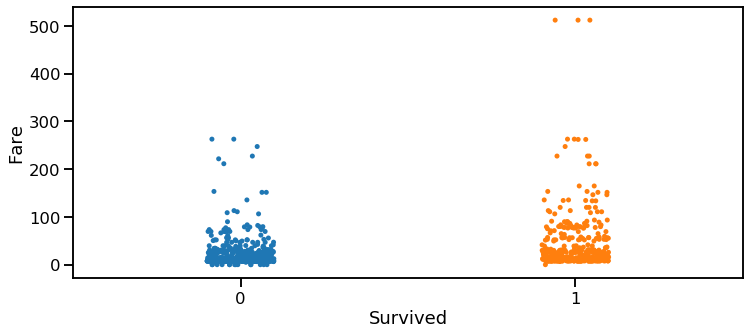

In [18]:
plt.figure(figsize=(12,5))
sns.stripplot('Survived','Fare',data = train)

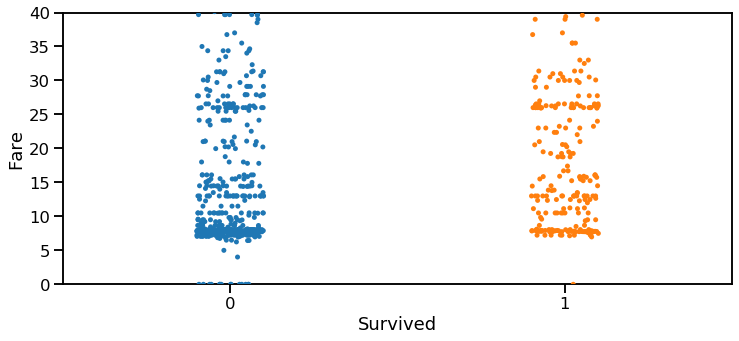

In [19]:
plt.figure(figsize=(12,5))
plt.ylim(0, 40)
sns.stripplot('Survived','Fare',data = train)

Again we don't see any pattern suitable to keep the Fare feature. We drop this too.

In [20]:
train.drop(['Fare'], axis = 1, inplace = True)

### 9) Cabin

In [21]:
train['Cabin'].nunique()

147

Obviously, since there is huge missing data with this feature as seen at the top, also the fact that there are too many unique entries in this feature, it won't help our model. Hence we drop this feature.

In [22]:
train.drop(['Cabin'], axis = 1, inplace = True)

### 10) Embarked

In [23]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Since there are only 2 missing values in the data of Embarked against 889 other, we can safely drop these 2 rows, since randomly selecting a value for these 2 rows may confuse the model as there are only 3 values in the Embarked section.

In [24]:
train.dropna(inplace = True)

In [25]:
# Fixing the indexes
train.index = [i for i in range(len(train))]

In [26]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

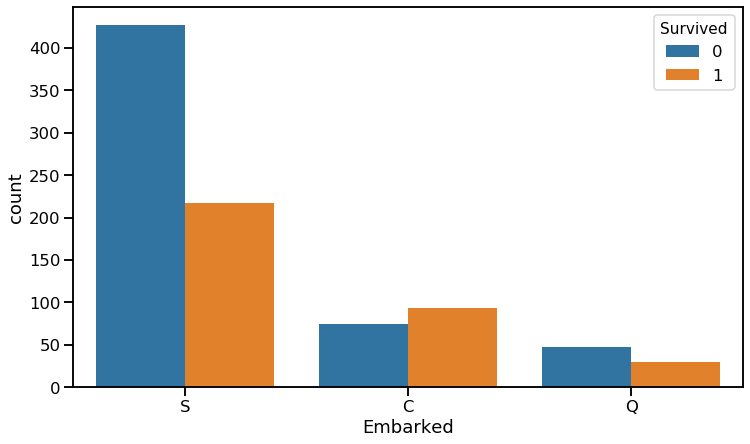

In [27]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'Embarked', data = train,hue = 'Survived')

As seen above, there is some relation between where the passenger embarked and his/her survival. So we keep this feature

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [31]:
train['Sex'] = le.fit_transform(train['Sex'])

In [32]:
train['Sex'].unique()

array([1, 0])

In [33]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
train['Embarked'] = le.fit_transform(train['Embarked'])

In [35]:
train['Embarked'].unique()

array([2, 0, 1])

# Encoding

As the features Embarked, Parch, SibSp & Pclass has more than 2 values, this may confuse the model into thinking that those are the values of those features. We need to encode these feature to {0,1} by splitting them into multiple features. This can be done with OneHotEncoding + Regularization (To remove the redundant features), OR with get_dummies method by dropping the first feature. Let us use the get_dummies method.

In [36]:
train = pd.get_dummies(train,columns = ['Pclass','Embarked','SibSp','Parch'],drop_first = True)

In [37]:
train.head()

,PassengerId,Survived,Sex,Pclass_2,Pclass_3,Embarked_1,Embarked_2,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Final Formatting and export

In [38]:
train_result = train['Survived']

In [39]:
train.drop(['Survived'], axis = 1, inplace = True)

In [40]:
train.to_csv('../CleanedData/Cleaner1_X_train')

In [41]:
train_result.to_csv('../CleanedData/Cleaner1_Y_train',header = True)

# Cleaning Test Data